In [1]:
import scipy.stats
print(dir(scipy.stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sensitivity_analysis', '_sobol', '_statlib', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_survival', '_tukeylambda_stats', '_variation

In [2]:
import sys
import pandas as pd
import numpy as np
sys.path.insert(0, 'C:/Udvikler/Speciale/SpecialeKode')
from utils import *
from model_evaluation.RFQModelEval import RFQModelEval, eval_utils
from DeepRFQAgent import DeepRFQAgent
from RFQAgent import DataTransformer, RFQAgent
from datatransformer import DataTransformerDeep

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

#Not to make the kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

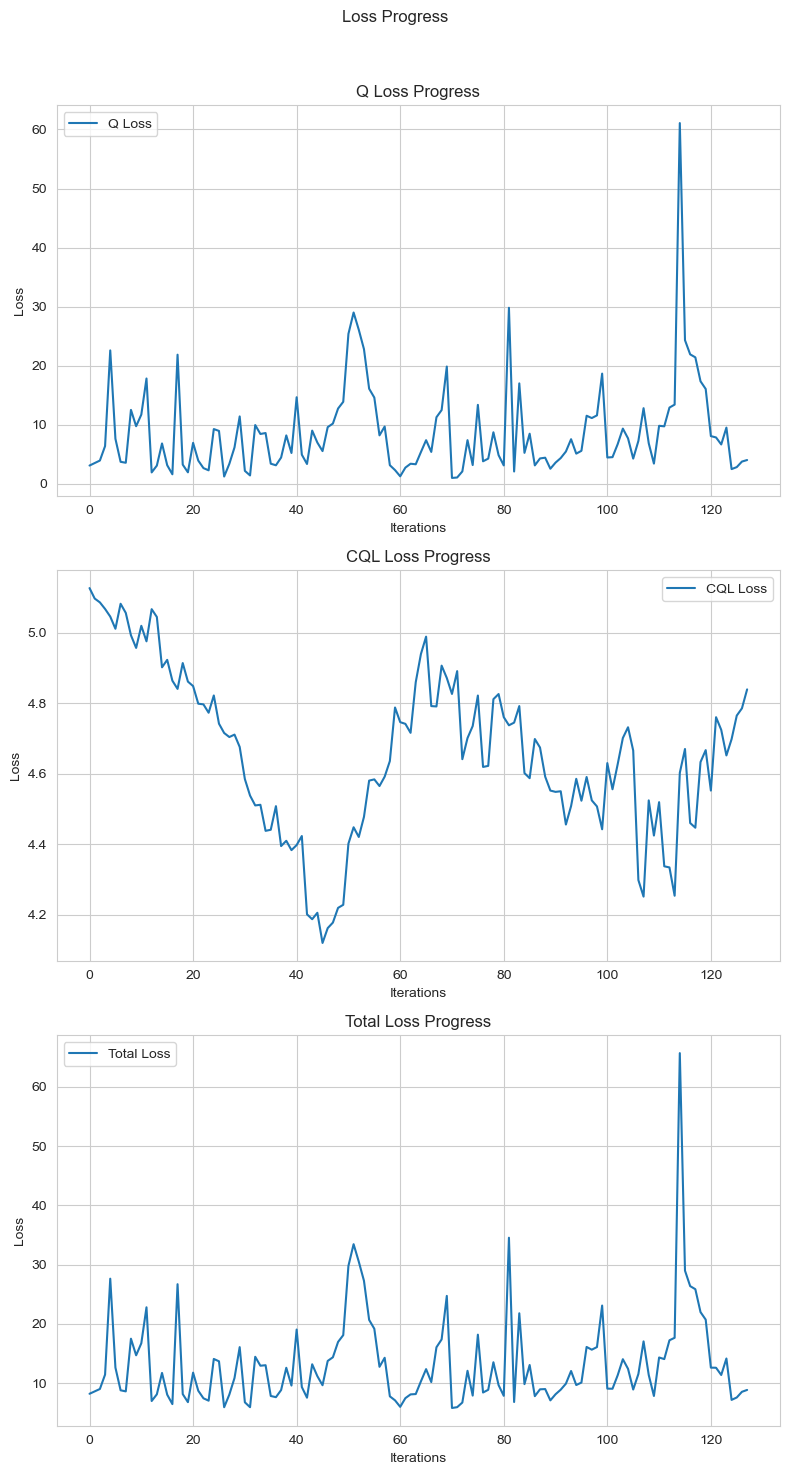

Desired HR: 23.591272955579974 

numtrades                1.503000e+03
meanDiC                  3.238856e+00
dealerHitRate            2.315000e+01
mlHitRate                1.730000e+01
MLWinShare               1.429542e+01
mlDistToCoverMean        1.870000e+00
mlDistToCoverStd         1.800851e+00
dealerDistToCoverMean    1.300000e+00
meanMLProfit             3.250000e+01
meanDealerProfit         8.120000e+01
meanMLPnLReward          8.271850e+06
meanDealerPnLReward      8.320596e+06
meanMLSharpeRatio        1.100000e-01
meanDealerSharpeRatio    1.100000e-01
meanRLReward             9.566486e-01
dealerD2TargetMean       2.230000e+00
MLD2TargetMean           4.660000e+00
MLD2TargetStd            3.949983e+00
dtype: float64


In [4]:


#######################################################

features = ["bpv_risk", "Side", "DealersInCompetition", "BookName",  "AllQMeanMid"]
#"inventoryRisk",

# Read the CSV file into a pandas DataFrame
file_path = "../data/data_inventory_risk.csv"
df = pd.read_csv(file_path)

# Datetime format
df["TradeTime"] = pd.to_datetime(df["TradeTime"], format="%m/%d/%Y %H:%M:%S")

#Split into train and test set  
train_df, test_df = split_data(df, 0.7)

#Further split test into val and test, to make model selection
#val_df, test_df = split_data(test_df.copy(), 0.5)

#Initialize datatransformer and agent 
data_transformer = DataTransformer(input_features = features, lower_spread_limit=-0.005, upper_spread_limit=0.15, 
                                   num_bins=4, discretize_method="number", reward_function=risk_PnL_reward, 
                                   opponent_actions=False, vectorize_next_state=True,
                                   reward_terms=True)

agent = DeepRFQAgent(data_transformer=data_transformer)
agent.train(train_df, algorithm='CQL_Segmented')

#Evaluate test data
modelEvaluator = RFQModelEval(agent)
modelPerformance = modelEvaluator.eval(test_df, algorithm='CQL_Segmented', print_post_trade=False, print_violin_plot=False)
    
print(modelPerformance)